In [3]:
from google.colab import userdata
import json

# Get the Kaggle credentials from Colab's userdata
username = userdata.get("KAGGLE_USER")
key = userdata.get("KAGGLE_KEY")

# Echo the credentials into the kaggle.json file
!mkdir -p ~/.kaggle
!echo '{{"username":"{username}","key":"{key}"}}' > ~/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [22]:
# !kaggle competitions download -c seed-classification
# !mkdir seed-classification
!unzip seed-classification.zip

Archive:  seed-classification.zip
  inflating: Sample_submission.csv   
  inflating: files/test/102871.png   
  inflating: files/test/106683.png   
  inflating: files/test/110070.png   
  inflating: files/test/110180.png   
  inflating: files/test/114155.png   
  inflating: files/test/116806.png   
  inflating: files/test/118560.png   
  inflating: files/test/1207.png     
  inflating: files/test/126174.png   
  inflating: files/test/128328.png   
  inflating: files/test/128775.png   
  inflating: files/test/129067.png   
  inflating: files/test/129927.png   
  inflating: files/test/131447.png   
  inflating: files/test/134742.png   
  inflating: files/test/137114.png   
  inflating: files/test/139159.png   
  inflating: files/test/149237.png   
  inflating: files/test/152378.png   
  inflating: files/test/154930.png   
  inflating: files/test/157238.png   
  inflating: files/test/158649.png   
  inflating: files/test/161042.png   
  inflating: files/test/164480.png   
  inflating: fil

## Overview

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import cv2
from tqdm import tqdm
from sklearn.model_selection import train_test_split

In [24]:
file_label = pd.read_csv('train.csv')
file_label['file_id'] = file_label['file_id'].apply(lambda x: 'files/train/' + str(x) + '.png')
file_label.head()

,file_id,class
0,files/train/218892.png,drypetes_roxburghii
1,files/train/259332.png,cassia_fistula
2,files/train/979327.png,bridelia_glauca
3,files/train/117664.png,albizia_chinensis
4,files/train/270929.png,prunus_cerasoides


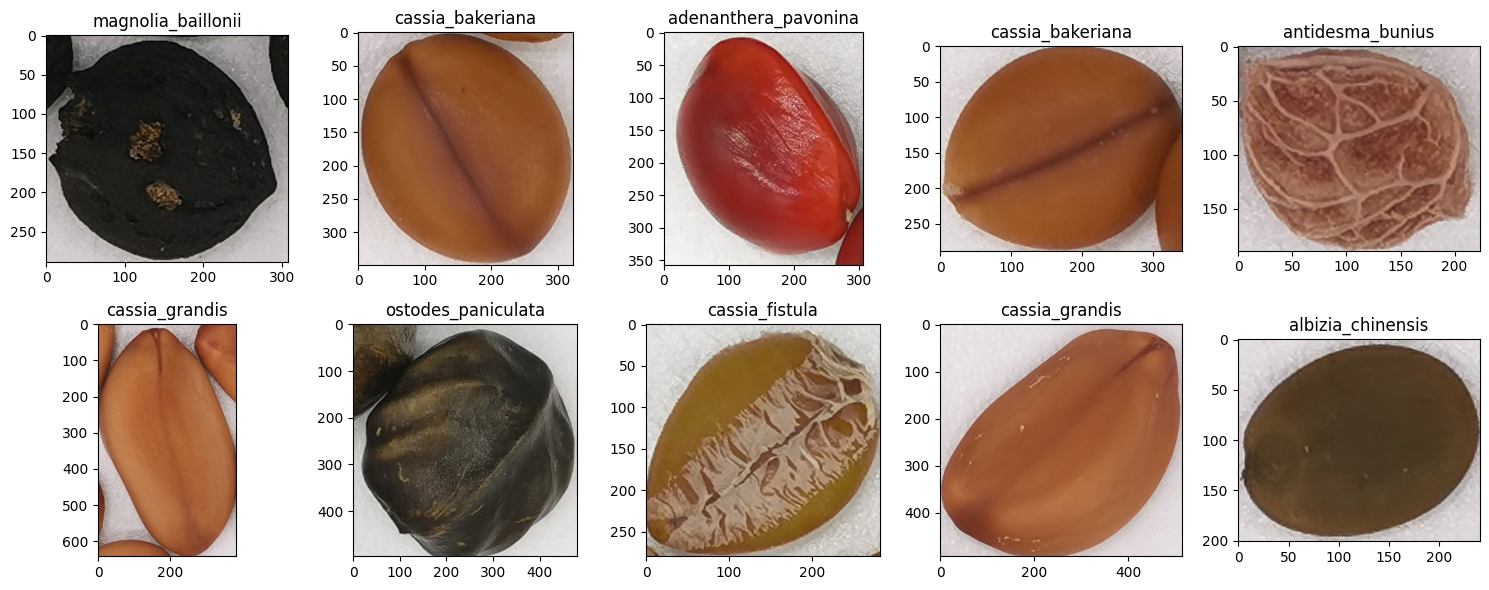

In [25]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

sample_img = file_label.sample(10).reset_index(drop=True)
for i, row in sample_img.iterrows():
    plt.subplot(2, 5, i+1)
    plt.imshow( plt.imread(row['file_id']) )
    plt.title(row['class'])

plt.tight_layout()
plt.show()

## Data prep (YOLO)

In [10]:
train_df, val_df = train_test_split(file_label, test_size=0.15, random_state=42)
train_df.shape, val_df.shape

((423, 2), (75, 2))

In [17]:
for dir_type in ['train', 'val',]:
    try:
        os.system(f'rm -rf seed_data/{dir_type}')
    except:
        pass

    for label in train_df['class'].unique():
        os.makedirs(f"seed_data/{dir_type}/{label}/")

In [27]:
def write_img_files(directory, df):
    for i, row in tqdm(df.iterrows()):
        img_path = row['file_id']
        label = row['class']

        filename = img_path.split('/')[-1]
        img = cv2.imread(img_path)
        img = cv2.resize(img, (224, 224))

        dest_path = f"{directory}/{label}/{filename}"
        cv2.imwrite(dest_path, img)

write_img_files('seed_data/train', train_df)
write_img_files('seed_data/val', val_df)

423it [00:03, 122.66it/s]
75it [00:00, 133.36it/s]


## Model Training

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.1/949.1 kB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 68.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 59.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8n-cls.pt')

results = model.train(data='/content/yolo_data', imgsz=224, batch=64,
                      device='cuda', epochs=20,)
model.save('YOLOv8_batch.pt')

Ultralytics 8.3.90 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/yolo_data, epochs=20, time=None, patience=100, batch=64, imgsz=224, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=

train: Scanning /content/yolo_data/train... 423 images, 0 corrupt: 100%|██████████| 423/423 [00:00<?, ?it/s]
val: Scanning /content/yolo_data/val... 75 images, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000417, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/classify/train3
Starting training for 20 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 33.16it/s]

                   all     0.0267      0.187



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 40.89it/s]

                   all     0.0267      0.253



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 27.74it/s]

                   all      0.147       0.36



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 20.95it/s]

                   all      0.293      0.533



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 34.39it/s]

                   all      0.387       0.72



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 22.56it/s]

                   all      0.507       0.84



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 21.17it/s]

                   all      0.613      0.947



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 36.93it/s]

                   all       0.72       0.96



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 33.78it/s]

                   all        0.8      0.973



      Epoch    GPU_mem       loss  Instances       Size


      10/20     0.832G      1.385         39        224: 100%|██████████| 7/7 [00:02<00:00,  3.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 32.25it/s]

                   all      0.813      0.973



      Epoch    GPU_mem       loss  Instances       Size


      11/20     0.832G      1.205         39        224: 100%|██████████| 7/7 [00:02<00:00,  3.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 33.96it/s]

                   all      0.853      0.987



      Epoch    GPU_mem       loss  Instances       Size


      12/20     0.832G      1.007         39        224: 100%|██████████| 7/7 [00:01<00:00,  3.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 34.38it/s]

                   all       0.88      0.987



      Epoch    GPU_mem       loss  Instances       Size


      13/20     0.832G     0.8709         39        224: 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 18.10it/s]

                   all       0.88      0.987



      Epoch    GPU_mem       loss  Instances       Size


      14/20     0.832G     0.7716         39        224: 100%|██████████| 7/7 [00:02<00:00,  3.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 21.47it/s]

                   all      0.893      0.987



      Epoch    GPU_mem       loss  Instances       Size


      15/20     0.832G     0.6227         39        224: 100%|██████████| 7/7 [00:02<00:00,  3.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 27.60it/s]

                   all      0.893      0.987



      Epoch    GPU_mem       loss  Instances       Size


      16/20     0.832G     0.5984         39        224: 100%|██████████| 7/7 [00:02<00:00,  3.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 27.77it/s]

                   all      0.893      0.987



      Epoch    GPU_mem       loss  Instances       Size


      17/20     0.832G     0.5581         39        224: 100%|██████████| 7/7 [00:02<00:00,  2.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 21.60it/s]

                   all      0.907      0.987



      Epoch    GPU_mem       loss  Instances       Size


      18/20     0.832G     0.5108         39        224: 100%|██████████| 7/7 [00:02<00:00,  2.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 30.32it/s]

                   all       0.92      0.987



      Epoch    GPU_mem       loss  Instances       Size


      19/20     0.832G     0.4682         39        224: 100%|██████████| 7/7 [00:02<00:00,  3.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 32.07it/s]

                   all       0.92      0.987



      Epoch    GPU_mem       loss  Instances       Size


      20/20     0.832G     0.4604         39        224: 100%|██████████| 7/7 [00:02<00:00,  3.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 32.73it/s]

                   all       0.92      0.987



20 epochs completed in 0.017 hours.
Optimizer stripped from runs/classify/train3/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train3/weights/best.pt, 3.0MB

Validating runs/classify/train3/weights/best.pt...
Ultralytics 8.3.90 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-cls summary (fused): 30 layers, 1,460,500 parameters, 0 gradients, 3.3 GFLOPs
train: /content/yolo_data/train... found 423 images in 20 classes ✅ 
val: /content/yolo_data/val... found 75 images in 20 classes ✅ 
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 16.92it/s]


                   all       0.92      0.987
Speed: 0.1ms preprocess, 0.3ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train3


## ViT

In [32]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.7 MB/s eta 0:00:00


In [41]:
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
from transformers import ViTForImageClassification, ViTFeatureExtractor, TrainingArguments, Trainer
from evaluate import load

# Step 1: Define Data Preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])

# Step 2: Load Dataset (Replace 'path_to_dataset' with actual path)
train_dataset = ImageFolder(root='/content/seed_data/train', transform=transform)
val_dataset = ImageFolder(root='/content/seed_data/val', transform=transform)
num_classes = len(train_dataset.classes)

# Step 3: Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

In [45]:
for batch in train_loader:
    print( len(batch) )
    break

2


In [47]:
# Step 4: Load Pretrained ViT Model
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224', num_labels=num_classes,
                                                  ignore_mismatched_sizes=True)

# Step 5: Define Training Arguments
training_args = TrainingArguments(
    output_dir='./results',
    logging_strategy='epoch',
    eval_strategy='epoch',
    save_strategy='epoch',
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=5,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    report_to='none',
)

# Step 6: Define Trainer & Train Model
metric = load("accuracy")
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
)

trainer.train()

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([20]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([20, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


TypeError: vars() argument must have __dict__ attribute

## Predictions

In [ ]:
test_df = pd.read_csv('/content/test.csv')
test_df['file_id'] = test_df['file_id'].apply(lambda x: 'files/test/' + str(x) + '.png')
test_df.head()

,file_id,class
0,files/test/737808.png,NaN
1,files/test/5807.png,NaN
2,files/test/72616.png,NaN
3,files/test/26829.png,NaN
4,files/test/432819.png,NaN


In [ ]:
y_pred = []
for img in tqdm(test_df['file_id'].tolist()):
    result = model(img, device='cuda', verbose=False)
    y_pred.append(result[0].probs.top1)

100%|██████████| 499/499 [00:07<00:00, 65.26it/s]


In [ ]:
result = model(test_df['file_id'][0], device='cuda', verbose=False)
label_map = result[0].names
print(label_map)

{0: 'adenanthera_pavonina', 1: 'alangium_kurzii', 2: 'albizia_chinensis', 3: 'antidesma_bunius', 4: 'bridelia_glauca', 5: 'cassia_bakeriana', 6: 'cassia_fistula', 7: 'cassia_grandis', 8: 'choerospondias_axillaris', 9: 'delbergia_oliveri', 10: 'drypetes_roxburghii', 11: 'hovenia_dulcis', 12: 'magnolia_baillonii', 13: 'ostodes_paniculata', 14: 'phyllanthus_emblica', 15: 'prunus_cerasoides', 16: 'rhus_rhetsoides', 17: 'sapindus_rarak', 18: 'trewia_nudiflora', 19: 'turpinia_pomifera'}


In [ ]:
pd.Series(y_pred).map(label_map)

,0
0,adenanthera_pavonina
1,trewia_nudiflora
2,cassia_bakeriana
3,turpinia_pomifera
4,cassia_fistula
...,...
494,drypetes_roxburghii
495,adenanthera_pavonina
496,cassia_grandis
497,turpinia_pomifera


In [ ]:
submission = pd.read_csv('/content/Sample_submission.csv')
submission['class'] = pd.Series(y_pred).map(label_map)
submission.head()

,file_id,class
0,737808,adenanthera_pavonina
1,5807,trewia_nudiflora
2,72616,cassia_bakeriana
3,26829,turpinia_pomifera
4,432819,cassia_fistula


In [ ]:
submission.to_csv('YOLOv8_1.csv', index=False)